In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path = os.path.join('data', 'covid')
csv_path = os.path.join(file_path, 'WHO-COVID-19-global-data.csv')

In [3]:
df = pd.read_csv(csv_path)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
132241,2021-07-09,ZW,Zimbabwe,AFRO,2156,62383,56,2029
132242,2021-07-10,ZW,Zimbabwe,AFRO,2683,65066,55,2084
132243,2021-07-11,ZW,Zimbabwe,AFRO,1787,66853,42,2126
132244,2021-07-12,ZW,Zimbabwe,AFRO,912,67765,59,2185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132246 entries, 0 to 132245
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      132246 non-null  object
 1   Country_code       131688 non-null  object
 2   Country            132246 non-null  object
 3   WHO_region         132246 non-null  object
 4   New_cases          132246 non-null  int64 
 5   Cumulative_cases   132246 non-null  int64 
 6   New_deaths         132246 non-null  int64 
 7   Cumulative_deaths  132246 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


In [5]:
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date_reported'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132246 entries, 0 to 132245
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      132246 non-null  object        
 1   Country_code       131688 non-null  object        
 2   Country            132246 non-null  object        
 3   WHO_region         132246 non-null  object        
 4   New_cases          132246 non-null  int64         
 5   Cumulative_cases   132246 non-null  int64         
 6   New_deaths         132246 non-null  int64         
 7   Cumulative_deaths  132246 non-null  int64         
 8   Date               132246 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 9.1+ MB


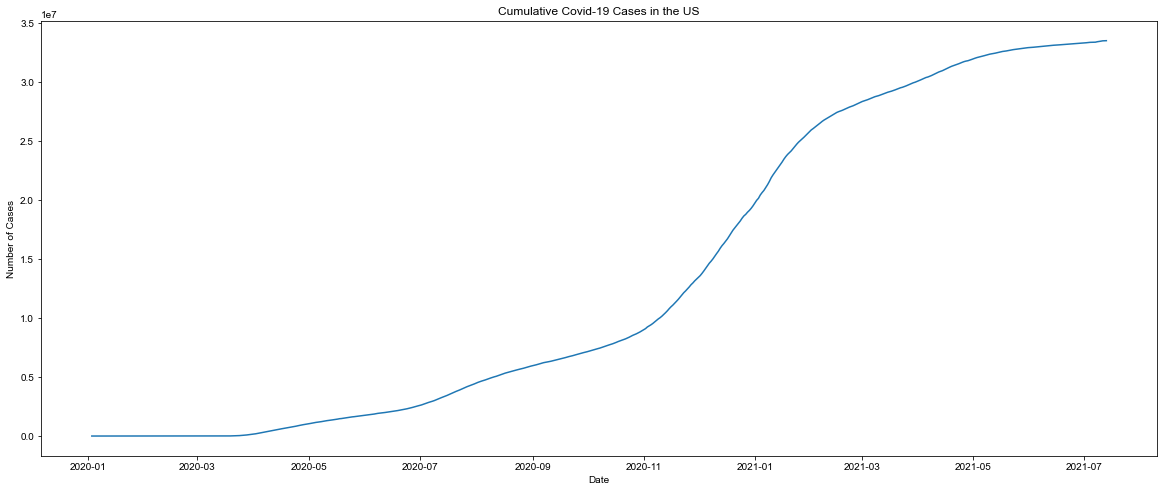

In [6]:
# sns.set(rc = {'figure.figsize': (18, 8)}, style = 'white')
fig,ax = plt.subplots(figsize = (20, 8))
ax = sns.lineplot(data = df[(df['Country'] == 'United States of America')], y = 'Cumulative_cases', x = 'Date')
sns.set_style('white')
# ax.set(yscale = 'log')
ax.grid(False)
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')
ax.set_title('Cumulative Covid-19 Cases in the US')
plt.show()

In [7]:
df.drop('Date', axis = 1, inplace = True)
# Let's recheck the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132246 entries, 0 to 132245
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      132246 non-null  object
 1   Country_code       131688 non-null  object
 2   Country            132246 non-null  object
 3   WHO_region         132246 non-null  object
 4   New_cases          132246 non-null  int64 
 5   Cumulative_cases   132246 non-null  int64 
 6   New_deaths         132246 non-null  int64 
 7   Cumulative_deaths  132246 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


In [8]:
# Convert the Date_reported column to a datetime 
df.loc[:, 'Date_reported'] = pd.to_datetime(df.Date_reported)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132246 entries, 0 to 132245
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      132246 non-null  datetime64[ns]
 1   Country_code       131688 non-null  object        
 2   Country            132246 non-null  object        
 3   WHO_region         132246 non-null  object        
 4   New_cases          132246 non-null  int64         
 5   Cumulative_cases   132246 non-null  int64         
 6   New_deaths         132246 non-null  int64         
 7   Cumulative_deaths  132246 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 8.1+ MB


## Sorting and Reindexing

In [9]:
df.sort_values(by = 'New_deaths', ascending = False).head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
126213,2020-04-17,US,United States of America,AMRO,27172,635562,6508,32047
54092,2021-06-10,IN,India,SEARO,94052,29183121,6148,359676
126516,2021-02-14,US,United States of America,AMRO,97779,27346921,5156,485070
126508,2021-02-06,US,United States of America,AMRO,124853,26552969,4827,461746
54070,2021-05-19,IN,India,SEARO,267334,25496330,4529,283248
54075,2021-05-24,IN,India,SEARO,222315,26752447,4454,303720
54069,2021-05-18,IN,India,SEARO,263533,25228996,4329,278719
75289,2021-06-03,MX,Mexico,AMRO,6917,2420659,4272,227840
16087,2021-04-10,BR,Brazil,AMRO,86652,13279857,4249,345025
54072,2021-05-21,IN,India,SEARO,259551,26031991,4209,291331


In [10]:
df.sort_values(by = 'New_cases', ascending = False).head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
54058,2021-05-07,IN,India,SEARO,414188,21491598,3915,234083
54057,2021-05-06,IN,India,SEARO,412262,21077410,3980,230168
54060,2021-05-09,IN,India,SEARO,403738,22296414,4092,242362
54052,2021-05-01,IN,India,SEARO,401993,19164969,3523,211853
54059,2021-05-08,IN,India,SEARO,401078,21892676,4187,238270
54053,2021-05-02,IN,India,SEARO,392488,19557457,3689,215542
54051,2021-04-30,IN,India,SEARO,386452,18762976,3498,208330
54056,2021-05-05,IN,India,SEARO,382315,20665148,3780,226188
54050,2021-04-29,IN,India,SEARO,379257,18376524,3645,204832
54054,2021-05-03,IN,India,SEARO,368147,19925604,3417,218959


In [11]:
df.nlargest(n = 10, columns = 'New_deaths')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
126213,2020-04-17,US,United States of America,AMRO,27172,635562,6508,32047
54092,2021-06-10,IN,India,SEARO,94052,29183121,6148,359676
126516,2021-02-14,US,United States of America,AMRO,97779,27346921,5156,485070
126508,2021-02-06,US,United States of America,AMRO,124853,26552969,4827,461746
54070,2021-05-19,IN,India,SEARO,267334,25496330,4529,283248
54075,2021-05-24,IN,India,SEARO,222315,26752447,4454,303720
54069,2021-05-18,IN,India,SEARO,263533,25228996,4329,278719
75289,2021-06-03,MX,Mexico,AMRO,6917,2420659,4272,227840
16087,2021-04-10,BR,Brazil,AMRO,86652,13279857,4249,345025
54072,2021-05-21,IN,India,SEARO,259551,26031991,4209,291331


In [12]:
# We can re index - our original index is now a column called index
df[df['Country'] == 'United States of America'].sort_values(by = 'New_cases', ascending = False).head(10).reset_index()

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,126481,2021-01-10,US,United States of America,AMRO,312247,21899583,3601,376644
1,126475,2021-01-04,US,United States of America,AMRO,280226,20434448,2578,357560
2,126480,2021-01-09,US,United States of America,AMRO,278047,21587336,4125,373043
3,126453,2020-12-13,US,United States of America,AMRO,250135,15923089,3024,300493
4,126479,2021-01-08,US,United States of America,AMRO,249893,21309289,3772,368918
5,126459,2020-12-19,US,United States of America,AMRO,246505,17214896,3446,316280
6,126488,2021-01-17,US,United States of America,AMRO,245914,23479599,3552,400108
7,126458,2020-12-18,US,United States of America,AMRO,243962,16968391,3420,312834
8,126482,2021-01-11,US,United States of America,AMRO,242706,22142289,3427,380071
9,126472,2021-01-01,US,United States of America,AMRO,237337,19750668,3726,349124


In [13]:
# We can change the index from the existing one to a date index
df.set_index('Date_reported', inplace = True)
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2021-07-09,ZW,Zimbabwe,AFRO,2156,62383,56,2029
2021-07-10,ZW,Zimbabwe,AFRO,2683,65066,55,2084
2021-07-11,ZW,Zimbabwe,AFRO,1787,66853,42,2126


In [16]:
df.loc['2020-03-01':'2020-03-25']

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-03-01,AF,Afghanistan,EMRO,0,5,0,0
2020-03-02,AF,Afghanistan,EMRO,0,5,0,0
2020-03-03,AF,Afghanistan,EMRO,0,5,0,0
2020-03-04,AF,Afghanistan,EMRO,0,5,0,0
2020-03-05,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...
2020-03-21,ZW,Zimbabwe,AFRO,1,2,0,0
2020-03-22,ZW,Zimbabwe,AFRO,0,2,0,0
2020-03-23,ZW,Zimbabwe,AFRO,0,2,0,0


In [17]:
df.loc["2020-04"]

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-04-01,AF,Afghanistan,EMRO,26,192,0,4
2020-04-02,AF,Afghanistan,EMRO,43,235,0,4
2020-04-03,AF,Afghanistan,EMRO,34,269,1,5
2020-04-04,AF,Afghanistan,EMRO,1,270,0,5
2020-04-05,AF,Afghanistan,EMRO,29,299,2,7
...,...,...,...,...,...,...,...
2020-04-26,ZW,Zimbabwe,AFRO,2,31,0,4
2020-04-27,ZW,Zimbabwe,AFRO,0,31,0,4
2020-04-28,ZW,Zimbabwe,AFRO,0,31,0,4


In [18]:
df.loc['2020-Q2']

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-04-01,AF,Afghanistan,EMRO,26,192,0,4
2020-04-02,AF,Afghanistan,EMRO,43,235,0,4
2020-04-03,AF,Afghanistan,EMRO,34,269,1,5
2020-04-04,AF,Afghanistan,EMRO,1,270,0,5
2020-04-05,AF,Afghanistan,EMRO,29,299,2,7
...,...,...,...,...,...,...,...
2020-06-26,ZW,Zimbabwe,AFRO,21,551,0,6
2020-06-27,ZW,Zimbabwe,AFRO,10,561,1,7
2020-06-28,ZW,Zimbabwe,AFRO,6,567,0,7


In [19]:
df.assign(week_day = lambda x: x.index.day_name())

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,week_day
Date_reported,,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Friday
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Saturday
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Sunday
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Monday
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Tuesday
...,...,...,...,...,...,...,...,...
2021-07-09,ZW,Zimbabwe,AFRO,2156,62383,56,2029,Friday
2021-07-10,ZW,Zimbabwe,AFRO,2683,65066,55,2084,Saturday
2021-07-11,ZW,Zimbabwe,AFRO,1787,66853,42,2126,Sunday


In [20]:
df_temp = df.loc["2020-4"]
df_temp[(df_temp.Country_code == 'US')]

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-04-01,US,United States of America,AMRO,22395,168208,511,3155
2020-04-02,US,United States of America,AMRO,22834,191042,752,3907
2020-04-03,US,United States of America,AMRO,27357,218399,912,4819
2020-04-04,US,United States of America,AMRO,25982,244381,970,5789
2020-04-05,US,United States of America,AMRO,35131,279512,1067,6856
2020-04-06,US,United States of America,AMRO,30593,310105,1157,8013
2020-04-07,US,United States of America,AMRO,25511,335616,1364,9377
2020-04-08,US,United States of America,AMRO,42604,378220,3243,12620
2020-04-09,US,United States of America,AMRO,21975,400195,674,13294


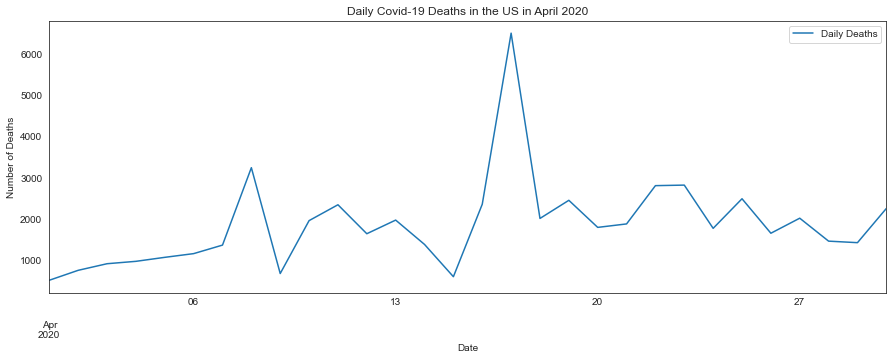

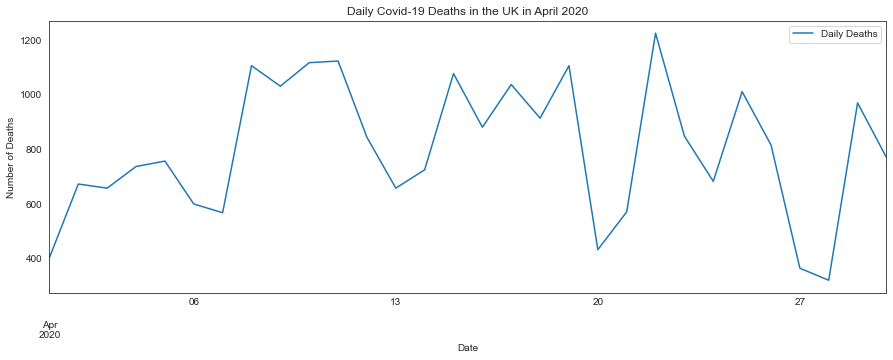

In [21]:
df_temp[(df_temp.Country_code == 'US')].plot(
    y = 'New_deaths',
    figsize = (15, 5),
    label = 'Daily Deaths',
    title = 'Daily Covid-19 Deaths in the US in April 2020'
)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
df_temp[(df_temp.Country_code == 'GB')].plot(
    y = 'New_deaths',
    figsize = (15, 5),
    label = 'Daily Deaths',
    title = 'Daily Covid-19 Deaths in the UK in April 2020'
)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()